In [185]:
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use(['science','no-latex'])

In [186]:
idx = ["0.02", "0.05", "0.08", "0.15", "0.25", "0.35"]
colors = ["tab:blue", "tab:orange", "tab:green", "tab:purple", "tab:gray", "tab:cyan"]
markers = ["o", "^", "2", "3", "*", "s"]

In [187]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

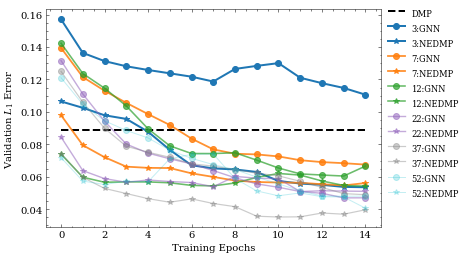

In [210]:
plt.figure(figsize=(6,4))
lw = 2
ms = 2
plt.plot(range(15), [0.089]*15, "--", c="k", lw=lw, label="DMP")
for i, (p, c, mk) in enumerate(zip(idx, colors, markers)):
    with open("../data/realnets/error2trainSize/gnn_dolphins_{}.pkl".format(p), "rb") as f:
        gnn = pkl.load(f)
    with open("../data/realnets/error2trainSize/nedmp_dolphins_{}.pkl".format(p), "rb") as f:
        nedmp = pkl.load(f)
    plt.plot(moving_average(gnn, 3)[:15], marker="o", lw=lw-0.2*i, c=c, alpha=1-0.15*i, label="{}:GNN".format(int(float(p)*150)))
    plt.plot(moving_average(nedmp, 3)[:15], marker="*", lw=lw-0.2*i, c=c, alpha=1-0.15*i, label="{}:NEDMP".format(int(float(p)*150)))
    
#     marker_x = list(range(100, 5))
#     plt.scatter(marker_x, moving_average(gnn, 10)[marker_x], marker=mk)
#     plt.scatter(marker_x, moving_average(gnn, 10)[marker_x], marker=mk)

   
plt.xlabel("Training Epochs")
plt.ylabel("Validation $L_1$ Error")
plt.legend(fontsize='small', ncol=1, handleheight=2.4, labelspacing=0, bbox_to_anchor=(1.0, 1.05))
plt.savefig("train_diff_dolphin.pdf", bbox_inches = 'tight')
plt.show()

In [216]:
len(gnn)

40

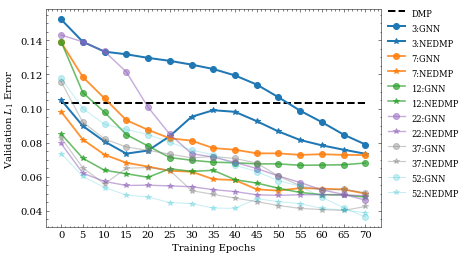

In [214]:
plt.figure(figsize=(6,4))
lw = 2
ms = 2
plt.plot(range(15), [0.103]*15, "--", c="k", lw=lw, label="DMP")
for i, (p, c, mk) in enumerate(zip(idx, colors, markers)):
    with open("../data/realnets/error2trainSize/gnn_norwegain_{}.pkl".format(p), "rb") as f:
        gnn = pkl.load(f)
    with open("../data/realnets/error2trainSize/nedmp_norwegain_{}.pkl".format(p), "rb") as f:
        nedmp = pkl.load(f)
    plt.plot(moving_average(gnn, 3)[:15], marker="o", lw=lw-0.2*i, c=c, alpha=1-0.15*i, label="{}:GNN".format(int(float(p)*150)))
    plt.plot(moving_average(nedmp, 3)[:15], marker="*", lw=lw-0.2*i, c=c, alpha=1-0.15*i, label="{}:NEDMP".format(int(float(p)*150)))
    
#     marker_x = list(range(100, 5))
#     plt.scatter(marker_x, moving_average(gnn, 10)[marker_x], marker=mk)
#     plt.scatter(marker_x, moving_average(gnn, 10)[marker_x], marker=mk)

plt.xticks(range(15), [str(i*5) for i in range(15)])
plt.xlabel("Training Epochs")
plt.ylabel("Validation $L_1$ Error")
plt.legend(fontsize='small', ncol=1, handleheight=2.4, labelspacing=0, bbox_to_anchor=(1.0, 1.05))
plt.savefig("train_diff_norwegain.pdf", bbox_inches = 'tight')
plt.show()

In [213]:
help(plt.xticks)

Help on function xticks in module matplotlib.pyplot:

xticks(ticks=None, labels=None, **kwargs)
    Get or set the current tick locations and labels of the x-axis.
    
    Pass no arguments to return the current values without modifying them.
    
    Parameters
    ----------
    ticks : array-like, optional
        The list of xtick locations.  Passing an empty list removes all xticks.
    labels : array-like, optional
        The labels to place at the given *ticks* locations.  This argument can
        only be passed if *ticks* is passed as well.
    **kwargs
        `.Text` properties can be used to control the appearance of the labels.
    
    Returns
    -------
    locs
        The list of xtick locations.
    labels
        The list of xlabel `.Text` objects.
    
    Notes
    -----
    Calling this function with no arguments (e.g. ``xticks()``) is the pyplot
    equivalent of calling `~.Axes.get_xticks` and `~.Axes.get_xticklabels` on
    the current axes.
    Calling this

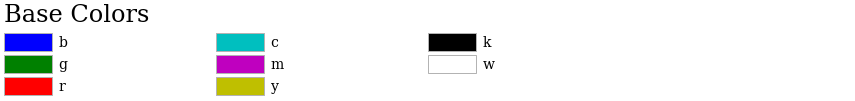

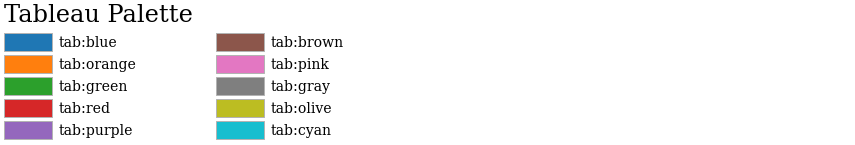

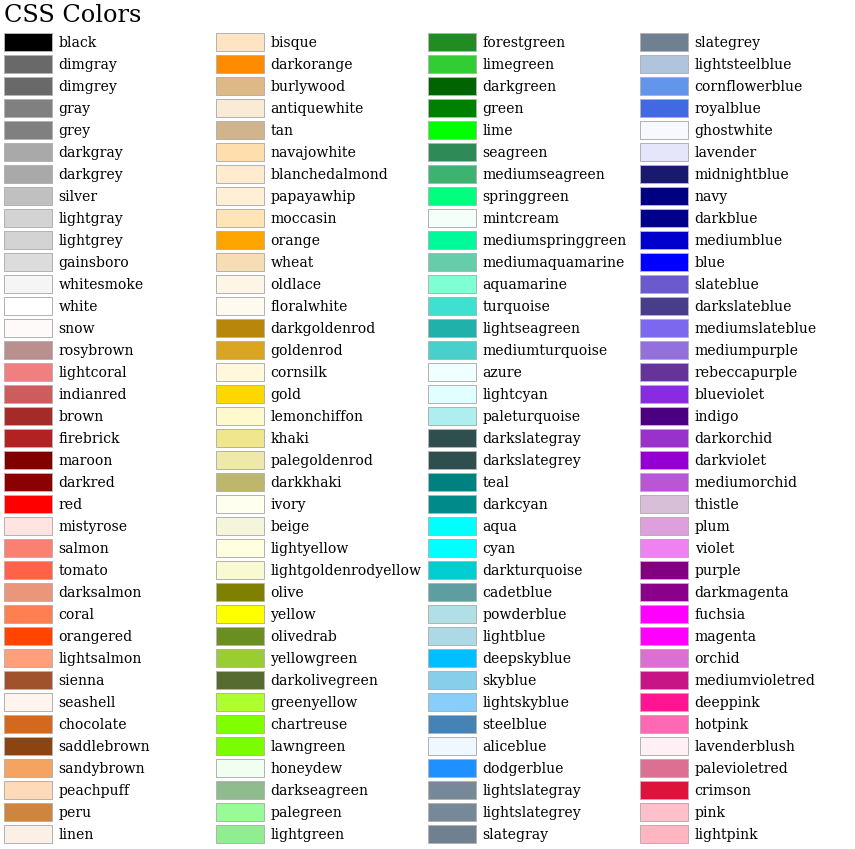

In [24]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

plot_colortable(mcolors.BASE_COLORS, "Base Colors",
                sort_colors=False, emptycols=1)
plot_colortable(mcolors.TABLEAU_COLORS, "Tableau Palette",
                sort_colors=False, emptycols=2)

plot_colortable(mcolors.CSS4_COLORS, "CSS Colors")

# Optionally plot the XKCD colors (Caution: will produce large figure)
# xkcd_fig = plot_colortable(mcolors.XKCD_COLORS, "XKCD Colors")
# xkcd_fig.savefig("XKCD_Colors.png")

plt.show()